<a href="https://colab.research.google.com/github/TomPhanAnh/Kaggle-Solution/blob/main/Red_Wine_%F0%9F%8D%B7_Quality_Assesment_%F0%9F%93%8A_%7C_Starter_Pack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the library
import plotly.offline as py
import plotly.express as px
import seaborn as sns
plt.style.use('fivethirtyeight')

# **About Dataset**

**Context**

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

In [ ]:
red_wine = pd.read_csv('winequality-red.csv')

# **Problem**

**The dataset contains the various attributes that describe the quality of the Red wine,** Problem is to select the most importance "n" attributes that can be further used to train the model using various feature selection techniques.
The various attributes of the dataset are as follows:

*1 - fixed acidity*

*2 - volatile acidity*

*3 - citric acid*

*4 - residual sugar*

*5 - chlorides*

*6 - free sulphur dioxide*

*7 - total sulfur dioxide*

*8 - density*

*9 - pH*

*10 - sulphates*

*11 - alcohol* 

Here the target variable is:
quality (3,4,5,6,7,8)

# **Data Preparation**

In [ ]:
red_wine.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [ ]:
red_wine.dropna(axis = 0, inplace =True)

# **Data understanding**

In [ ]:
red_wine.shape

(1599, 12)

In [ ]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
red_wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
re

,fixed acidity,quality
0,60.4,5
1,60.8,5
2,60.8,5
3,65.2,6
4,60.4,5
...,...,...
1594,59.2,5
1595,59.9,6
1596,60.3,6
1597,58.9,5


In [ ]:
# Create a function in order to make Ridge density plot
def ridge_density(con_col, dis_col, data):
  g  = np.array(data['quality'])
  df = data[[con_col, 'quality']]
  # Initialize the Facegrid Object
  pal = sns.cubehelix_palette(10, rot = -.25, light = .7)
  g   = sns.FacetGrid(df, row = dis_col, hue = dis_col, aspect = 15, height = .5, palette = pal)

  # Draw the densities in a few steps
  g.map(sns.kdeplot, con_col, 
        bw_adjust = .5, clip_on = False,
        fill = True, alpha = 1, linewidth = 1.5)
  g.map(sns.kdeplot, con_col, clip_on = False, color = 'w', lw = 2, bw_adjust = .5)

  # Passing color = None to refline() to label the plot in axes coordinates
  def label(x, color, label):
    ax = plt.gca()
    ax.text(0,.5, label , fontweight = 'bold', color = color,
            ha = 'left', va = 'center', transform = ax.transAxes)
  g.map(label, con_col)

  # Set the subplots to overlap
  g.figure.subplots_adjust(hspace=-.25)

  # Remove axes details that don't play well with overlap
  g.set_titles("")
  g.fig.suptitle("Data distribution Between Quantity and {}".format(con_col))
  g.set(yticks=[], ylabel="")
  g.despine(bottom=True, left=True)

In [ ]:
red_wine.iloc[:,:-2].columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations

/usr/local/lib/python3.7/dist-packages/seaborn/axi

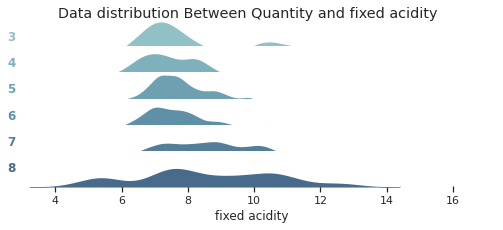

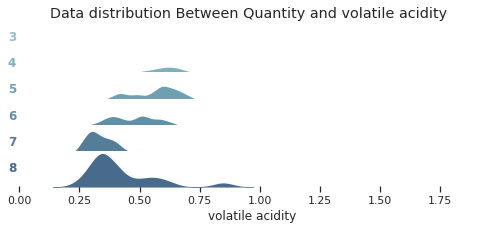

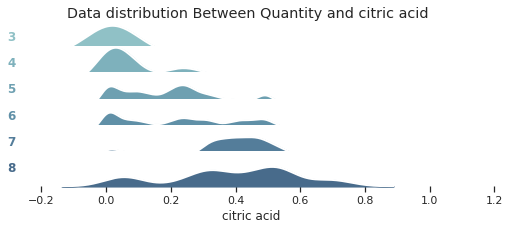

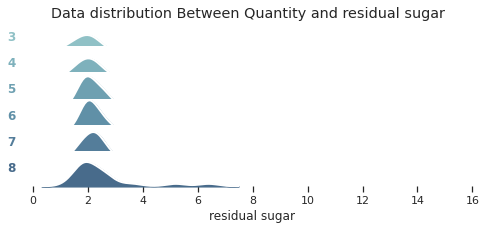

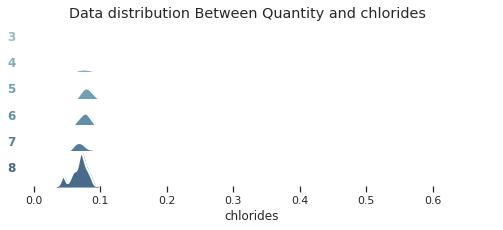

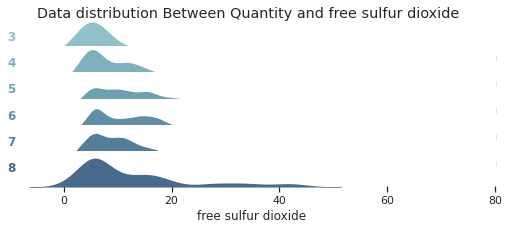

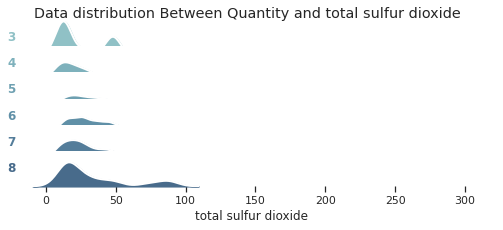

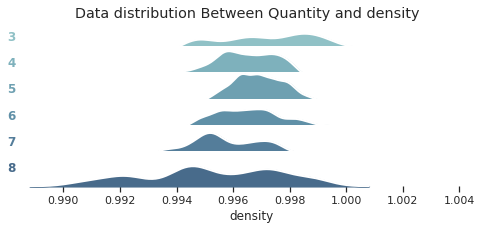

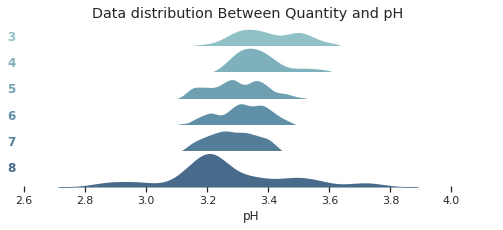

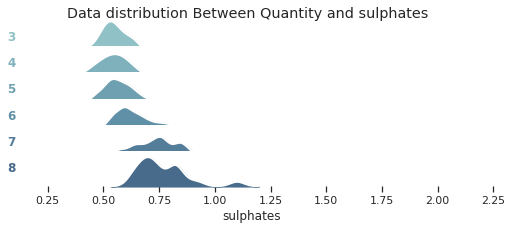

In [ ]:
for i in red_wine.iloc[:,:-2].columns:
  ridge_density(i,'quality', red_wine)

# **Data Distribution with box plot**

In [ ]:
import plotly.express as px
fig = px.box(red_wine, y= "sulphates", x="quality",
             color = 'quality', points = 'all', 
             title="Data Distribution between Sulphates and Quality")

fig.show()

In [ ]:
fig = px.box(red_wine, y= "fixed acidity", x="quality",
             color = 'quality', points = 'all', 
             title="Data Distribution between Fixed Acidity and Quality")

fig.show()

In [ ]:
fig = px.box(red_wine, y= "volatile acidity", x="quality",
             color = 'quality', points = 'all', 
             title="Data Distribution between Volacity Acidity and Quality")

fig.show()

In [ ]:
fig = px.box(red_wine, y= "citric acid", x="quality",
             color = 'quality', points = 'all', 
             title="Data Distribution between Citric Acidity and Quality")

fig.show()

In [ ]:
fig = px.box(red_wine, y= "residual sugar", x="quality",
             color = 'quality', points = 'all', 
             title="Data Distribution between Residual Sugar and Quality")

fig.show()

In [ ]:
fig = px.box(red_wine, y= "chlorides", x="quality",
             color = 'quality', points = 'all', 
             title="Data Distribution between Chlorides and Quality")

fig.show()

In [ ]:
fig = px.box(red_wine, y= "chlorides", x="quality",
             color = 'quality', points = 'all', 
             title="Data Distribution between Chlorides and Quality")

fig.show()

In [ ]:
fig = px.box(red_wine, y= "free sulfur dioxide", x="quality",
             color = 'quality', points = 'all', 
             title="Data Distribution between Free Sulfur Dioxide and Quality")

fig.show()

In [ ]:
fig = px.box(red_wine, y= "total sulfur dioxide", x="quality",
             color = 'quality', points = 'all', 
             title="Data Distribution between Total Sulfur Dioxide and Quality")

fig.show()

In [ ]:
fig = px.box(red_wine, y= "density", x="quality",
             color = 'quality', points = 'all', 
             title="Data Distribution between Density and Quality")

fig.show()

In [ ]:
fig = px.box(red_wine, y= "pH", x="quality",
             color = 'quality', points = 'all', 
             title="Data Distribution between pH and Quality")

fig.show()

In [ ]:
fig = px.box(red_wine, y= "alcohol", x="quality",
             color = 'quality', points = 'all', 
             title="Data Distribution between Alcohol and Quality")

fig.show()

# **Red Wine 🍷 Quality Assesment 📊 Using Correlation between Variables**

Text(0.5, 1.0, 'Correlation matrix between Variables')

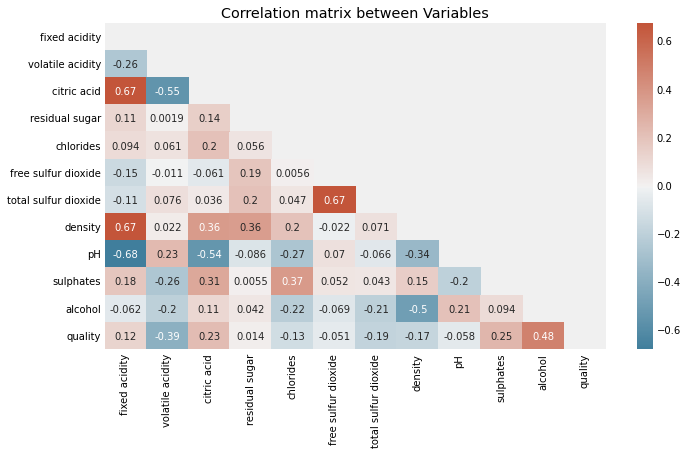

In [ ]:
data = red_wine.corr()
plt.figure(figsize = (10,6))
mask = np.triu(np.ones_like(data, dtype = bool))
cmap = sns.diverging_palette(230,20, as_cmap = True)
sns.heatmap(data, mask = mask, cmap = cmap,annot = True).set_title("Correlation matrix between Variables")

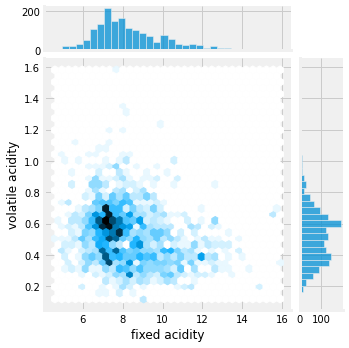

In [ ]:
sns.jointplot(x = 'fixed acidity', y = 'volatile acidity', 
              kind = 'hex', data = red_wine,
              height = 5, ratio = 5, marginal_ticks = True)

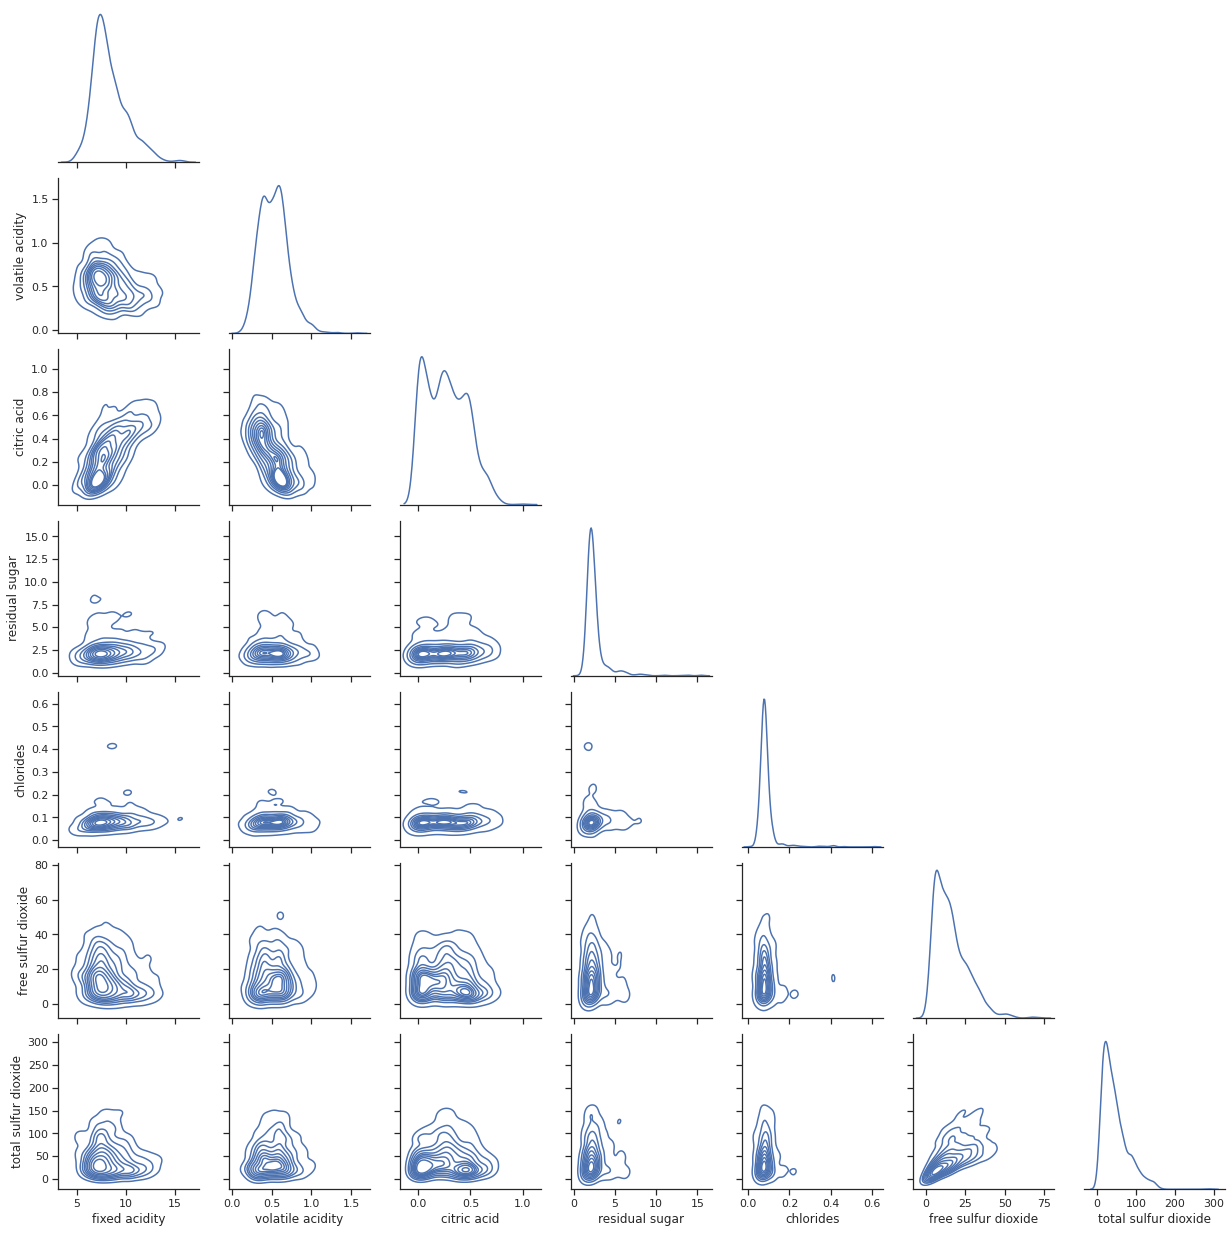

In [ ]:
g = sns.PairGrid(red_wine.iloc[:,:-5],diag_sharey=False, corner=True)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)

# **Machine Learning Processing to predict Category Variable Quality**

**Then use train_test_split to cut your data up into X_train, X_test, y_train, y_test, with a test_size of 30% and a random_state of 7**

**Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.**

In [ ]:
from sklearn.model_selection import train_test_split
x = red_wine.drop(columns = "quality", axis = 1)
y = red_wine['quality']
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.3,
                                                    random_state = 7 )

In [ ]:
y_train = np.array(y_train).reshape(-1,1)
y_test  = np.array(y_test).reshape(-1,1)

**Fit and score your model appropriately. Store the score in the score variable and print it.**

In [ ]:
#TO DO:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
score = model.score(X_train, y_train)
print("Độ Chính xác của mô hình: {}".format(score))

Độ Chính xác của mô hình: 0.5924932975871313


**Draw the model, X_test, y_test, score(R2 score) using the drawLine function.**

In [ ]:
def drawLine(model, X_test, y_test, title, R2):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X_test, y_test, c='g', marker='o')
    ax.plot(X_test, model.predict(X_test), color='orange', linewidth=1, alpha=0.7)

    title += " R2: " + str(R2)
    ax.set_title(title)
    print(title)
    print("Intercept(s): ", model.intercept_)

    plt.show()

In [ ]:
#TO DO:
from sklearn.metrics import r2_score
y_hat = model.predict(X_test)
r2_score = r2_score(y_test, y_hat)
print("R2 Model: {}".format(r2_score))

R2 Model: 0.1513761467889908


**Finetune at least 3 parameters to get the KNN model with best accuracy. Then, print out the KNN model's parameters with the best accuracy(best estimator).**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
#TO DO:
k_range = list(range(1,21))
param_grid = {"n_neighbors": k_range,
              "weights":["uniform", "distance"],
              "leaf_size": list(range(10,21)),
              'p':[1,2]
              
              }
grid = GridSearchCV(knn, 
                    param_grid, 
                    cv = 10, 
                    scoring = 'accuracy',
                     return_train_score=True,verbose=1)
grid_search_knn=grid.fit(X_train, y_train)

Fitting 10 folds for each of 880 candidates, totalling 8800 fits


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using r

**Run the prediction on KNN models on training data and test data, then calculate the f1 score and Jaccard similarity score and save it to f1_scores dict and jaccard_scores dict.**

Requirement: F1 score on test data must be higher than 0.6, Jaccard similarity score must be higher than 0.75.

In [ ]:
grid_search_knn.best_estimator_

KNeighborsClassifier(leaf_size=10, n_neighbors=19, p=1, weights='distance')

In [ ]:
#TO DO:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(leaf_size=10, n_neighbors=19, p=1, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy Score là: {}".format(accuracy_score(y_test, y_pred)))


Accuracy Score là: 0.6145833333333334


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



# **Decision Tree**
**Perform task 11 and 12 on the DT model.**
Hint: Using GridSearchCV in sklearn.model_selection.

**Warning:** You should not use the test data for finding the best parameters.

**Requirement:** F1 score on test data has to higher than 0.6, the Jaccard similarity score must be higher than 0.73.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#TO DO:
model = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
param_grid = {'max_features':['auto','sqrt','log2'],
              'ccp_alpha':[0.1,0.01,0.001],
              'max_depth': [5,6,7,8],
              'min_samples_leaf': [4,6,8,10],
              'splitter':["best", "random"],
              'criterion':['gini','entrophy']}
grid_search_dt = GridSearchCV(model, param_grid=param_grid, cv=5, verbose=True)
grid_search_dt.fit(X_train, y_train)         

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


1440 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1440 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'entrophy'


/usr/local/lib/python3.7/dist

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entrophy'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [4, 6, 8, 10],
                         'splitter': ['best', 'random']},
             verbose=True)

In [ ]:
dtc = DecisionTreeClassifier(ccp_alpha=0.001, max_depth=6, max_features='auto',
                       min_samples_leaf=6)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print("Accuracy Score là: {}".format(accuracy_score(y_test, y_pred)))

Accuracy Score là: 0.55625


# **Additional Question:**
**Interpret and explain the parameters you have chosen to fine tune in DT algorithm.**

Type your answer in the cell bellow as the markdown format.

TO DO:

# **Support Vector Machine**

**Hint:** Using GridSearchCV in sklearn.model_selection.

**Warning:** You should not use the test data for finding the best parameters.

**Requirement:** F1 score on test data has to higher than 0.62, Jaccard similarity score must be higher than 0.75.

In [ ]:
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100, 1000,10000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,.00001],
              'kernel': ['rbf']}
grid_svc = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid_svc.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.438 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.442 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.442 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.438 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.439 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.438 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.442 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.442 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.438 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.439 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.487 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.482 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.460 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.442 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.502 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.518 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.500 total time=   0.1s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.446 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.491 total time=   0.1s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.498 total time=   0.1s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.487 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.496 total time=   0.1s
[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.446 total time=   0.1s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.473 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.498 total time=   0.1s
[CV 1/5] END ....C=0.1, gamma=1e-05, kernel=rbf;, score=0.438 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=1e-05, kernel=rbf;, score=0.442 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END ....C=0.1, gamma=1e-05, kernel=rbf;, score=0.442 total time=   0.1s
[CV 4/5] END ....C=0.1, gamma=1e-05, kernel=rbf;, score=0.438 total time=   0.1s
[CV 5/5] END ....C=0.1, gamma=1e-05, kernel=rbf;, score=0.439 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.540 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.536 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.536 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.562 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.556 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.567 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.585 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.562 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.549 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.596 total time=   0.2s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.487 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.527 total time=   0.1s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.513 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.487 total time=   0.1s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.578 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.527 total time=   0.2s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.540 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.469 total time=   0.2s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.504 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.534 total time=   0.2s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.496 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.496 total time=   0.1s
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.455 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.491 total time=   0.1s
[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.507 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END ......C=1, gamma=1e-05, kernel=rbf;, score=0.491 total time=   0.1s
[CV 2/5] END ......C=1, gamma=1e-05, kernel=rbf;, score=0.496 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END ......C=1, gamma=1e-05, kernel=rbf;, score=0.446 total time=   0.1s
[CV 4/5] END ......C=1, gamma=1e-05, kernel=rbf;, score=0.473 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 5/5] END ......C=1, gamma=1e-05, kernel=rbf;, score=0.507 total time=   0.1s
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.549 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.522 total time=   0.2s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.540 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.576 total time=   0.2s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.556 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.527 total time=   0.1s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.567 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.585 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.571 total time=   0.3s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.516 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.513 total time=   0.1s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.580 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.536 total time=   0.2s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.571 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.578 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.554 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.580 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.536 total time=   0.3s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.531 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.592 total time=   0.3s
[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.549 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.549 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.482 total time=   0.2s
[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.522 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.556 total time=   0.2s
[CV 1/5] END .....C=10, gamma=1e-05, kernel=rbf;, score=0.482 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END .....C=10, gamma=1e-05, kernel=rbf;, score=0.491 total time=   0.2s
[CV 3/5] END .....C=10, gamma=1e-05, kernel=rbf;, score=0.460 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END .....C=10, gamma=1e-05, kernel=rbf;, score=0.487 total time=   0.2s
[CV 5/5] END .....C=10, gamma=1e-05, kernel=rbf;, score=0.502 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.549 total time=   0.4s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.522 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.540 total time=   0.2s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.576 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.556 total time=   0.2s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.540 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.580 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.589 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.567 total time=   0.2s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.534 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.513 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.594 total time=   0.2s
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.536 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.585 total time=   0.2s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.561 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.536 total time=   0.2s
[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.621 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.558 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.576 total time=   0.2s
[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.610 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.576 total time=   0.1s
[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.612 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.558 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.545 total time=   0.3s
[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.619 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END ....C=100, gamma=1e-05, kernel=rbf;, score=0.545 total time=   0.1s
[CV 2/5] END ....C=100, gamma=1e-05, kernel=rbf;, score=0.576 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END ....C=100, gamma=1e-05, kernel=rbf;, score=0.473 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END ....C=100, gamma=1e-05, kernel=rbf;, score=0.531 total time=   0.3s
[CV 5/5] END ....C=100, gamma=1e-05, kernel=rbf;, score=0.565 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.549 total time=   0.2s
[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.522 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.540 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.576 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.556 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.540 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.580 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.589 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.567 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.516 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.518 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.621 total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.567 total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.594 total time=   1.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.587 total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.545 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.612 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.554 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.625 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.628 total time=   0.3s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.554 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.616 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.549 total time=   0.2s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.594 total time=   0.2s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.614 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END ...C=1000, gamma=1e-05, kernel=rbf;, score=0.580 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END ...C=1000, gamma=1e-05, kernel=rbf;, score=0.603 total time=   0.2s
[CV 3/5] END ...C=1000, gamma=1e-05, kernel=rbf;, score=0.567 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END ...C=1000, gamma=1e-05, kernel=rbf;, score=0.558 total time=   0.2s
[CV 5/5] END ...C=1000, gamma=1e-05, kernel=rbf;, score=0.614 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END ......C=10000, gamma=1, kernel=rbf;, score=0.549 total time=   0.2s
[CV 2/5] END ......C=10000, gamma=1, kernel=rbf;, score=0.522 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END ......C=10000, gamma=1, kernel=rbf;, score=0.540 total time=   0.2s
[CV 4/5] END ......C=10000, gamma=1, kernel=rbf;, score=0.576 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 5/5] END ......C=10000, gamma=1, kernel=rbf;, score=0.556 total time=   0.2s
[CV 1/5] END ....C=10000, gamma=0.1, kernel=rbf;, score=0.540 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END ....C=10000, gamma=0.1, kernel=rbf;, score=0.580 total time=   0.1s
[CV 3/5] END ....C=10000, gamma=0.1, kernel=rbf;, score=0.589 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END ....C=10000, gamma=0.1, kernel=rbf;, score=0.567 total time=   0.2s
[CV 5/5] END ....C=10000, gamma=0.1, kernel=rbf;, score=0.516 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END ...C=10000, gamma=0.01, kernel=rbf;, score=0.549 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END ...C=10000, gamma=0.01, kernel=rbf;, score=0.585 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END ...C=10000, gamma=0.01, kernel=rbf;, score=0.585 total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END ...C=10000, gamma=0.01, kernel=rbf;, score=0.594 total time=   0.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 5/5] END ...C=10000, gamma=0.01, kernel=rbf;, score=0.552 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END ..C=10000, gamma=0.001, kernel=rbf;, score=0.540 total time=   1.9s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END ..C=10000, gamma=0.001, kernel=rbf;, score=0.607 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END ..C=10000, gamma=0.001, kernel=rbf;, score=0.522 total time=   1.5s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END ..C=10000, gamma=0.001, kernel=rbf;, score=0.589 total time=   1.8s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 5/5] END ..C=10000, gamma=0.001, kernel=rbf;, score=0.614 total time=   1.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END .C=10000, gamma=0.0001, kernel=rbf;, score=0.580 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END .C=10000, gamma=0.0001, kernel=rbf;, score=0.598 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END .C=10000, gamma=0.0001, kernel=rbf;, score=0.562 total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END .C=10000, gamma=0.0001, kernel=rbf;, score=0.594 total time=   0.6s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 5/5] END .C=10000, gamma=0.0001, kernel=rbf;, score=0.592 total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 1/5] END ..C=10000, gamma=1e-05, kernel=rbf;, score=0.580 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 2/5] END ..C=10000, gamma=1e-05, kernel=rbf;, score=0.585 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 3/5] END ..C=10000, gamma=1e-05, kernel=rbf;, score=0.549 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 4/5] END ..C=10000, gamma=1e-05, kernel=rbf;, score=0.580 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[CV 5/5] END ..C=10000, gamma=1e-05, kernel=rbf;, score=0.605 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid_svc.best_estimator_

SVC(C=1000, gamma=0.001)

In [ ]:
#TO DO:
svc = SVC(C=1000, gamma=0.001)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("Accuracy Score là: {}".format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy Score là: 0.5875


**Logistic Regression**

Perform task on Logistic Regression model.

**Hint:** Using GridSearchCV in sklearn.model_selection.

**Warning:** You should not use the test data for finding the best parameters.

**Requirement:** F1 score on test data has to higher than 0.63, Jaccard similarity score must be higher than 0.75.

In [ ]:
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"],"max_iter":[100,200]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 9 members, which is less than n_splits=10.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was p

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'max_iter': [100, 200], 'penalty': ['l1', 'l2']})

In [ ]:
logreg_cv.best_estimator_

LogisticRegression(C=100.0, max_iter=200)

In [ ]:
#TO DO:
logreg=LogisticRegression(C=100.0, max_iter=200)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy Score là: {}".format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy Score là: 0.5770833333333333


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# **Advanced part (15% of the total score)**

**Ensemble model**

Perform soft voting on the 4 above models (using the same setting for the 4 models as in previous steps.)

# **Hint: Using VotingClassifier in sklearn.ensemble.**

In [ ]:
#TO DO:
#create a dictionary of our models
from sklearn.ensemble import VotingClassifier
md1 = KNeighborsClassifier(leaf_size=10, n_neighbors=19, p=1, weights='distance')
md2 = DecisionTreeClassifier(ccp_alpha=0.001, max_depth=6, max_features='auto',
                       min_samples_leaf=6)
md3 = SVC(C=1000, gamma=0.001)
md4 = LogisticRegression(C=100.0, max_iter=200)

#create our voting classifier, inputting our models
eclf1 = VotingClassifier(estimators=[('md1',md1),('md2',md2), ('md3',md3),('md4',md4)], weights = [1,0.5,2,1]).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



** Run the prediction on the ensembling model using soft voting on training data and test data, then calculate the f1 score and Jaccard similarity score and save it to f1_scores dict and jaccard_scores dict.**

**Requirement:** F1 score on test data must be higher than 0.66, Jaccard similarity score must be higher than 0.78.

In [ ]:
#TO DO:
y_pred = eclf1.predict(X_test)
print("Accuracy Score là: {}".format(accuracy_score(y_test, y_pred)))

Accuracy Score là: 0.5979166666666667


# **Perform  using hard voting.**
**Hint:** Using GridSearchCV in sklearn.model_selection.

**Warning:**You should not use the test data for finding the best parameters.

**Requirement:** F1 score on test data must be higher than 0.57, Jaccard similarity score must be higher than 0.73.

In [ ]:
#TO DO:
#create a dictionary of our models
from sklearn.ensemble import VotingClassifier
md1 = KNeighborsClassifier()
md2 = DecisionTreeClassifier()
md3 = SVC()
md4 = LogisticRegression()

#create our voting classifier, inputting our models
eclf2 = VotingClassifier(estimators=[('lr', md1),('lr2', md2),('rf', md3), ('gnb', md4)], voting = 'hard', weights = [3,1,1,1]).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
#TO DO:
y_pred = eclf2.predict(X_test)
print("Accuracy Score là: {}".format(accuracy_score(y_test, y_pred)))

Accuracy Score là: 0.5229166666666667


# **Report**

You should be able to report the accuracy of the built model using different evaluation metrics:

Algorithm	Jaccard-training	F1-score-training	Jaccard-testing	F1-score-testing


In [ ]:
accuracy_scores = {'train':{'KNN': accuracy_score(y_train,knn.predict(X_train)), 
                        'DT': accuracy_score(y_train,dtc.predict(X_train)), 
                        'SVM': accuracy_score(y_train,svc.predict(X_train)), 
                        'LR': accuracy_score(y_train,logreg.predict(X_train))
                      , 'EN_HARD': accuracy_score(y_train,eclf1.predict(X_train)),   
                        'EN_SOFT': accuracy_score(y_train,eclf2.predict(X_train))}, 
                  'test':{'KNN': accuracy_score(y_test,knn.predict(X_test)), 
                     'DT': accuracy_score(y_test,dtc.predict(X_test)), 
                     'SVM': accuracy_score(y_test,svc.predict(X_test)), 
                     'LR': accuracy_score(y_test, logreg.predict(X_test)), 
                     'EN_HARD': accuracy_score(y_test, eclf1.predict(X_test)), 
                     'EN_SOFT': accuracy_score(y_test, eclf2.predict(X_test))}}

In [ ]:
result = pd.DataFrame({"Accuracy Training":accuracy_scores['train'],
              "Accuracy Testing":accuracy_scores['test']})
result.rename(index = {'DT':'Decision Tree',
                       'LR':'Logistic Regression','EN_HARD':'Hard Voting','EN_SOFT':'Soft Voting'})

,Accuracy Training,Accuracy Testing
KNN,1.000000,0.614583
Decision Tree,0.651475,0.556250
SVM,0.691689,0.587500
Logistic Regression,0.598749,0.577083
Hard Voting,0.717605,0.597917
Soft Voting,0.687221,0.522917
